<a href="https://colab.research.google.com/github/Aayushi4925/cardiovasular/blob/main/cardiovascular_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive  #mounting the drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

In [3]:
path = '/content/drive/MyDrive/data_cardiovascular_risk.csv'   #giving path for csv file
df = pd.read_csv(path)

In [ ]:
df.shape   #number of rows and columns in dataset

(3390, 17)

In [ ]:
pd.set_option('display.max_columns',None)  #displaying all the columns of dataset
df.head()  #first five rows

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
pd.set_option('display.max_columns',None)
df.tail()  #last five rows of dataset

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [ ]:
df.isnull().sum()   #checking null values in the dataset

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
df.info()   #info returns datatype and non null counts in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [6]:
df_temp = df.copy() #creating copy of the dataset to make changes

In [ ]:
numerical_features = [i for i in df_temp if df_temp[i].dtypes!='O']  #seggragating numerical and categorical features

In [ ]:
categorical_features = [i for i in df_temp if df_temp[i].dtypes =='O']

In [ ]:
continous_features = ['totchol','sysBP','diaBP','BMI','heartRate','age']

In [ ]:
numerical_features

['id',
 'age',
 'education',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

In [ ]:
categorical_features

['sex', 'is_smoking']

In [ ]:
def value_count(col_name):
  print(df[col_name].value_counts())   #function to get value count of different categories

In [ ]:
value_count('sex')  #Females are more as compared to males

F    1923
M    1467
Name: sex, dtype: int64


In [ ]:
value_count('is_smoking')  # minor difference in yes and no

NO     1703
YES    1687
Name: is_smoking, dtype: int64


In [ ]:
df_temp.describe()   #describes statistical summary of the dataset


,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


**Observation:**
1. In age column mean and meadian is almost equal which indicates it is near to normal distribution
2. Dataset consist the data of people from 32 to 70 years.
3. In total cholestrol minimum value is 237 and maximum is 696. However 75% of people comes under 264
4. Systolic Blood pressure is slightly right skewed as median is less than mean
5. Diastolic blood pressure is close to normal distribution 
6. SysBP , cholestrol and DiaBP  and heartRate has some outliers value
which is possible cause of age or medical conditions
7. cigs per days shows that almost half of the people don't smoke.
  On the other hand some people consuming 70 cigs a day

In [ ]:
df_temp['education'].unique()  #unique values in education column

array([ 2.,  4.,  1.,  3., nan])

In [ ]:
nominal = ['BPMeds','prevalentStroke','prevalentHyp','diabetes']  #list out nominal features  
nominal

['BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

**Univariate** **Analysis**

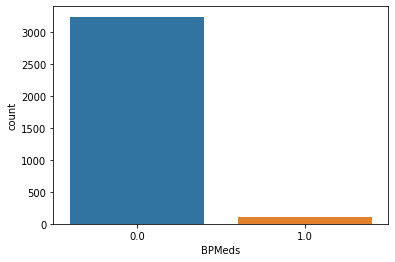

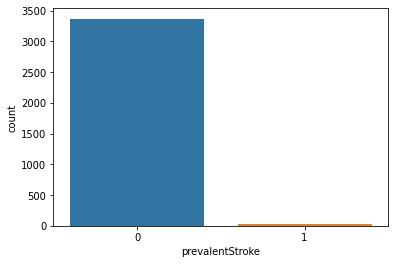

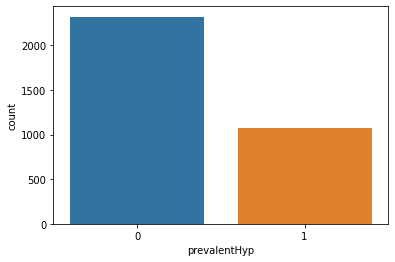

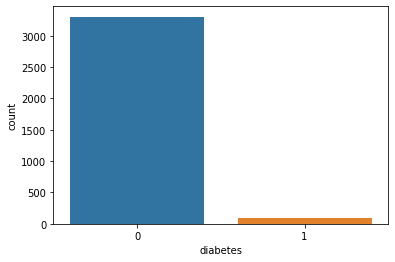

In [ ]:
for i in nominal:
  sns.countplot(x=i,data=df_temp)    #visualizling counplot for nominal features 
  df_temp[i].value_counts()
  plt.show()

# It clear that for all the nominal columns the value for No is extremely high
# and makes it unbalanced

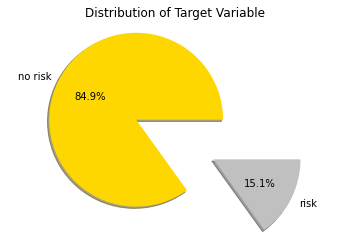

In [ ]:
#Dependent variable
labels = 'no risk', 'risk'
sizes = df_temp['TenYearCHD'].value_counts()
col = ['gold','silver']
explode = [1,0]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', explode = explode, colors = col,
        shadow=True)
plt.title("Distribution of Target Variable")
plt.plot()
plt.show()  
#Target variable is imbalanced and understood that 84.9% of people has no risk of coronary disease

In [4]:
def hist(colname):
  df_temp[colname].hist(bins=10)
  plt.show()

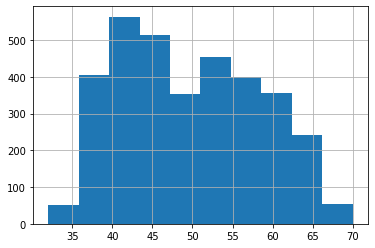

In [7]:
hist('age')

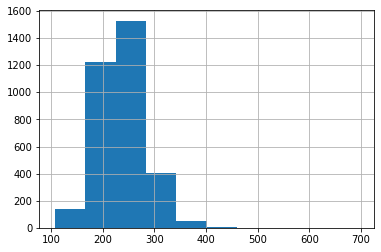

In [8]:
hist('totChol')

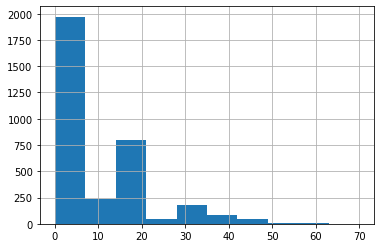

In [9]:
hist('cigsPerDay')

**Bivariate Analysis**

In [ ]:
yes=0
no=0
for i,j in zip(df_temp['TenYearCHD'],df_temp['prevalentHyp']):
    if(i==1 and j==1):
        yes+=1
    elif(i==0 and j==1):
        no+=1
print('People was with hypertensive and risk for coronary risk',yes)
print('People was with hypertensive but no risk for coronary risk',no)

People was with hypertensive and risk for coronary risk 255
People was with hypertensive but no risk for coronary risk 814


In [ ]:
def catplot(col1,col2):
  sns.catplot(x=col1,y=col2,kind='boxen',data=df_temp)
  plt.show()
  sns.boxplot(df_temp[col2])
  plt.show()

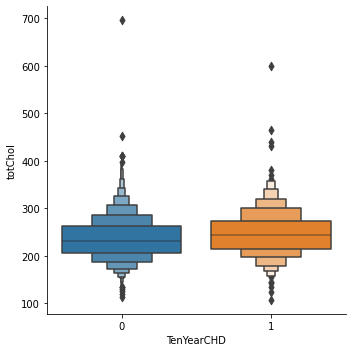

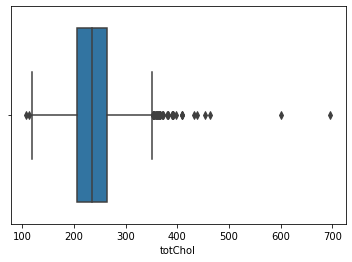

In [ ]:
catplot('TenYearCHD','totChol')

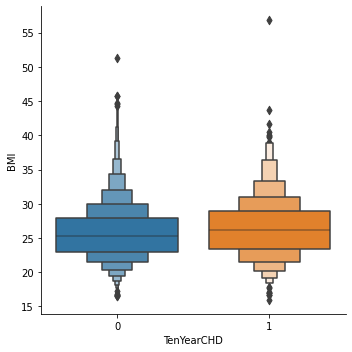

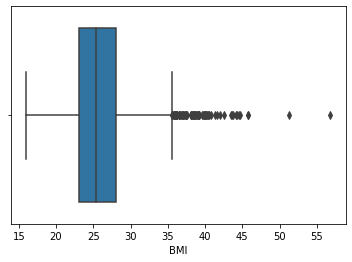

In [ ]:
catplot('TenYearCHD','BMI')

In [ ]:
def bivariate(colname,hue):
  sns.countplot(df_temp[colname],hue=hue,data=df_temp)

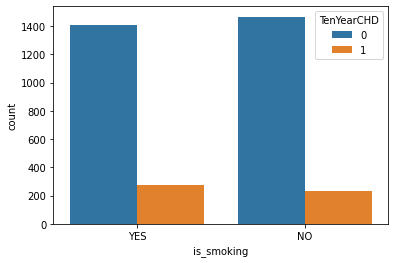

In [ ]:
bivariate('is_smoking','TenYearCHD')

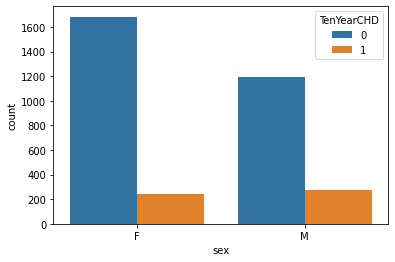

In [ ]:
bivariate('sex','TenYearCHD')

Observations:

1. It is clear that catplots between target variable and BMI , Totchol it is almost same (median, outliers)
2. is_smoking shows that smoking is somehow leads to coronary disease risk
3. Though the number of females is more in dataset for males is risk is slightly higher as compare to females

In [ ]:
def boxplot(colname):
  plt.figure(figsize=(10,8))
  sns.boxplot(x='TenYearCHD',y=colname,data=df)

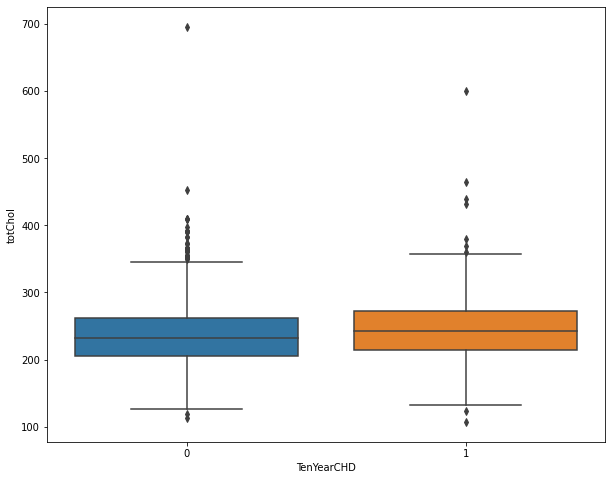

In [ ]:
boxplot('totChol')

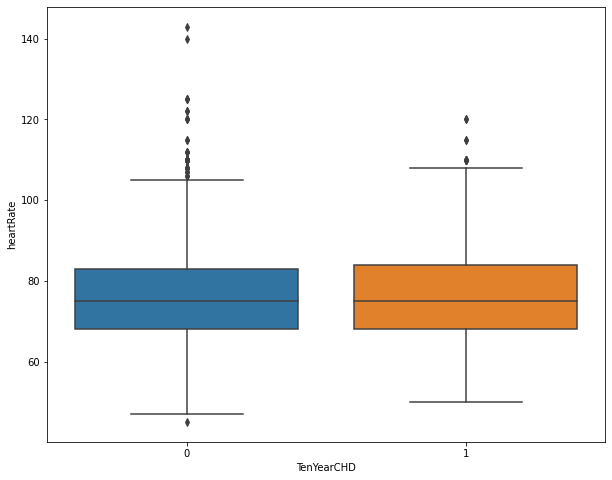

In [ ]:
boxplot('heartRate')
#If we would not ignore the outliers then people with no risk has high heart rate as compare to people have risk foe coronary disease

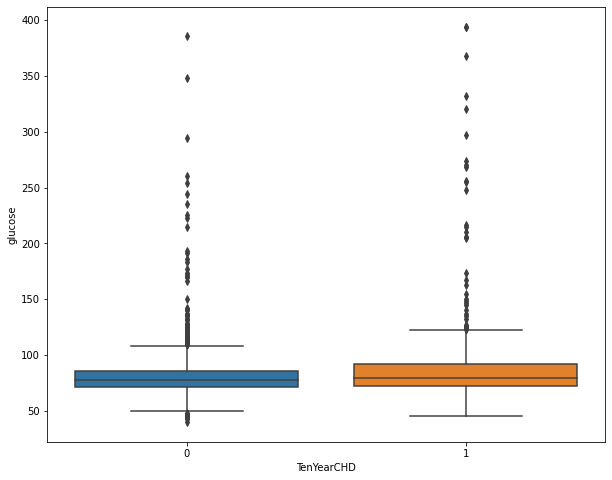

In [ ]:
boxplot('glucose')

In [ ]:
col_with_null = [i for i in df_temp if df_temp[i].isnull().sum() !=0]  #listing out null value columns

In [ ]:
col_with_null

['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']

In [ ]:
#dropping of glucose column as this column contains approx. 10% null values
df_temp.drop('glucose',axis=1,inplace=True)

In [ ]:
def fixnan(col):
  df_temp[col] = np.where(df_temp[col].isnull(),df_temp[col].median(),df_temp[col])  
  
   #replacing null with median because this columns has outliers which would affect the mean value

In [ ]:
fixnan('BMI')
fixnan('heartRate')
fixnan('cigsPerDay')
fixnan('totChol')

In [ ]:
#replacing these two columns with mode as they are nominal
df_temp['BPMeds'] =  np.where(df_temp['BPMeds'].isnull(),df_temp['BPMeds'].mode(),df_temp['BPMeds'])

In [ ]:
df_temp['education'] =  np.where(df_temp['education'].isnull(),df_temp['education'].mode(),df_temp['education'])

In [ ]:
df_temp.isnull().sum()  #no null values now in dataset

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
TenYearCHD         0
dtype: int64

In [10]:
continous_feature = ['totChol','sysBP', 'diaBP', 'BMI', 'heartRate', 'age']  #continous columns of the dataset

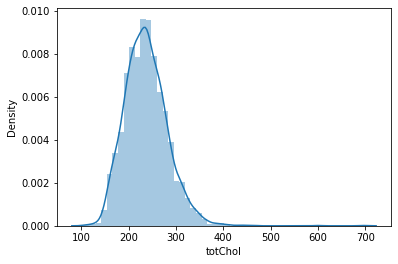

0.9406357047700903


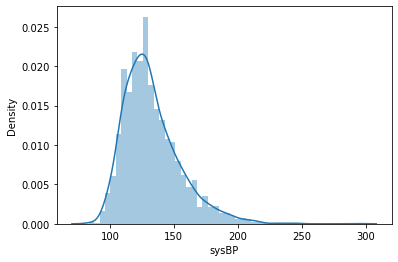

1.1758367309612197


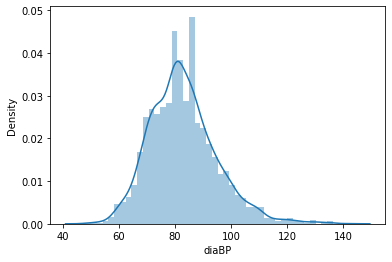

0.7181726683579213


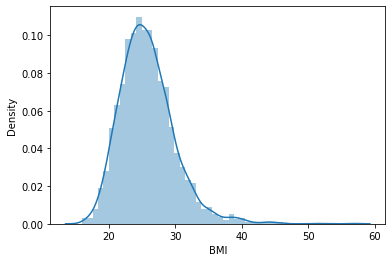

1.0222520011438563


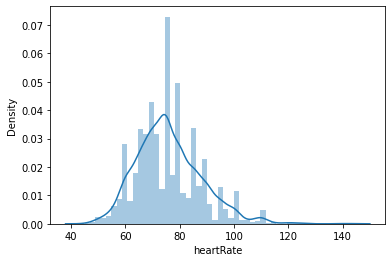

0.6764897223370003


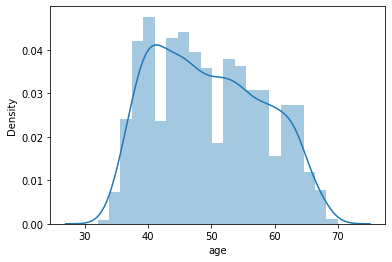

0.2257958756715891


In [11]:
for i in continous_feature:
  sns.distplot(df_temp[i])
  plt.show()
  print(df_temp[i].skew())
  #distribution plot to check the skewness of the columns

Considering the theshold of 0.5 almost all the columns

In [ ]:
#Function returning lower and outer bound of the column

def outlier_treat(datacol):
    q1,q3 = np.percentile(datacol,[25,75])
    iqr = q3-q1
    upper_l  = q3 + 1.5*iqr
    lower_l  = q1 - 1.5*iqr
    return upper_l,lower_l
    

In [ ]:
for i in continous_feature:
  u,l = outlier_treat(df_temp[i])
  df_temp[i] = np.where(df_temp[i]>u,df_temp[i].median(),df_temp[i])
  


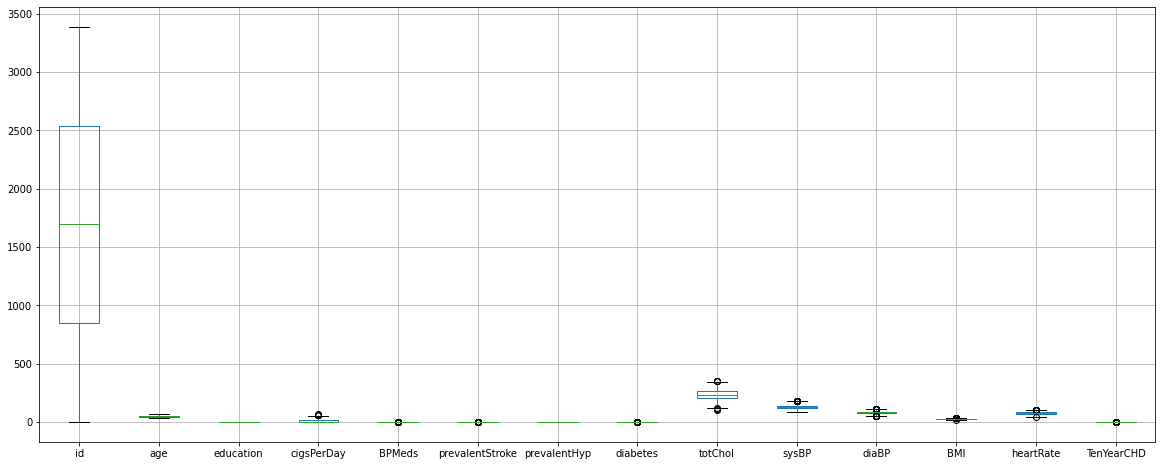

In [ ]:
plt.figure(figsize=(20,8))
df_temp.boxplot()

In [ ]:
df_temp.drop('id',axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
ord_en = OrdinalEncoder()
df_temp['sex']= ord_en.fit_transform(df_temp['sex'].values.reshape(-1,1))
df_temp['is_smoking']= ord_en.fit_transform(df_temp['is_smoking'].values.reshape(-1,1))


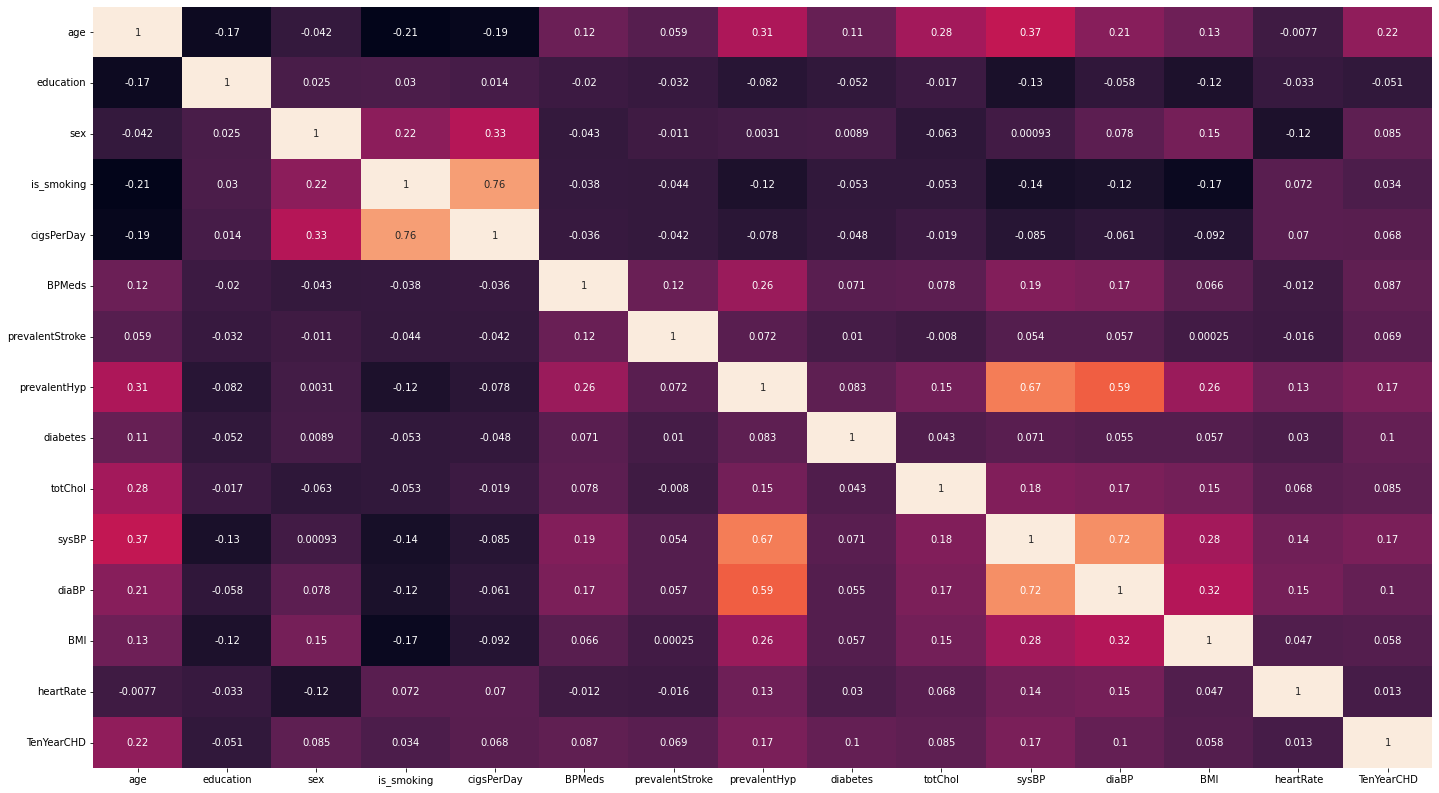

In [ ]:
plt.figure(figsize=(24,14))
sns.heatmap(df_temp.corr(),annot=True,cbar=False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df_temp = pd.DataFrame(sc.fit_transform(df_temp),columns=df_temp.columns)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
x = df_temp.drop('TenYearCHD',axis=1)
y= df_temp['TenYearCHD']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33)

In [ ]:
lr =  LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
accuracy_score(pred,y_test)

0.8462913315460232

In [ ]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

         0.0       0.67      0.92      0.77       687
         1.0       0.67      0.26      0.38       432

    accuracy                           0.67      1119
   macro avg       0.67      0.59      0.58      1119
weighted avg       0.67      0.67      0.62      1119



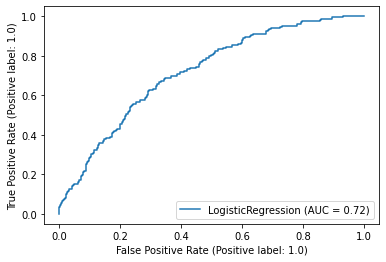

In [ ]:
plot_roc_curve(lr,x_test,y_test)
plt.show() 


In [ ]:
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=i)
    lr =  LogisticRegression()
    lr.fit(x_train,y_train)
    pred_test = lr.predict(x_test)
    pred_train = lr.predict(x_train)
    if(round(accuracy_score(pred_test,y_test)*100,1)==round(accuracy_score(pred_train,y_train)*100,1)):
        print('random state',i)
        print('test accuracy',accuracy_score(pred_test,y_test))
        print('train accuracy',accuracy_score(pred_train,y_train))

random state 8
test accuracy 0.8525469168900804
train accuracy 0.8533685601056803
random state 22
test accuracy 0.8534405719392315
train accuracy 0.8533685601056803
random state 41
test accuracy 0.8552278820375335
train accuracy 0.8551298987230295
random state 153
test accuracy 0.8552278820375335
train accuracy 0.8551298987230295
random state 199
test accuracy 0.8543342269883825
train accuracy 0.8542492294143549
random state 220
test accuracy 0.8525469168900804
train accuracy 0.8533685601056803
random state 239
test accuracy 0.8543342269883825
train accuracy 0.8542492294143549
random state 288
test accuracy 0.8534405719392315
train accuracy 0.8533685601056803
random state 292
test accuracy 0.8561215370866846
train accuracy 0.8555702333773668
random state 319
test accuracy 0.8543342269883825
train accuracy 0.8542492294143549
random state 321
test accuracy 0.8525469168900804
train accuracy 0.8533685601056803
random state 352
test accuracy 0.8543342269883825
train accuracy 0.8542492294143

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=292)

In [ ]:
from sklearn.feature_selection import RFE
rfe_obj = RFE(estimator=lr,step=1)
rfe_obj = rfe_obj.fit(x_train,y_train)
features = pd.DataFrame({'features_selected':list(x_train.columns),'ranking_of_features':rfe_obj.ranking_})
features.sort_values(by='ranking_of_features',ascending=True)

,features_selected,ranking_of_features
0,age,1
4,cigsPerDay,1
6,prevalentStroke,1
7,prevalentHyp,1
8,diabetes,1
9,totChol,1
10,sysBP,1
2,sex,2
12,BMI,3
11,diaBP,4


In [ ]:
x_train_rfe = rfe_obj.transform(x_train)
x_test_rfe = rfe_obj.transform(x_test)
rfe_model = lr.fit(x_train_rfe,y_train)
p = rfe_model.predict(x_test_rfe)
accuracy_score(p,y_test)

0.8507596067917784

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(x, y)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0.0, 2879), (1.0, 2879)]


In [ ]:
x_train_u,x_test_u,y_train_u,y_test_u = train_test_split(X_resampled, y_resampled,test_size=.33)

In [ ]:
lr = LogisticRegression()
lr.fit(x_train_u,y_train_u)
pred = lr.predict(x_test)
print(accuracy_score(pred,y_test))
print(classification_report(pred,y_test))

0.6550491510277033
              precision    recall  f1-score   support

         0.0       0.65      0.92      0.76       668
         1.0       0.69      0.26      0.38       451

    accuracy                           0.66      1119
   macro avg       0.67      0.59      0.57      1119
weighted avg       0.67      0.66      0.61      1119



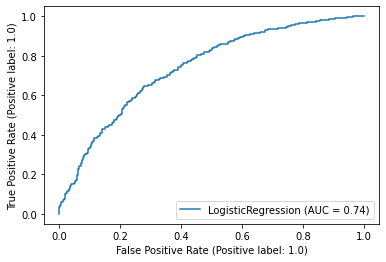

In [ ]:
plot_roc_curve(lr,x_test_u,y_test_u)
plt.show() 

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
runder = RandomUnderSampler()
x_under,y_under = runder.fit_resample(x,y)
print(Counter(y_under))

Counter({0.0: 511, 1.0: 511})


In [ ]:
x_train_,x_test_,y_train_,y_test_ = train_test_split(x_under,y_under,test_size=.33)

In [ ]:
lr = LogisticRegression()
lr.fit(x_train_,y_train_)
LogisticRegression()
pred = lr.predict(x_test)
print(accuracy_score(pred,y_test))

0.6666666666666666


In [ ]:
pred_u = lr.predict(x_test_)
print(accuracy_score(pred_u,y_test_))
print(classification_report(pred_u,y_test_))

0.6775147928994083
              precision    recall  f1-score   support

         0.0       0.67      0.67      0.67       165
         1.0       0.69      0.68      0.68       173

    accuracy                           0.68       338
   macro avg       0.68      0.68      0.68       338
weighted avg       0.68      0.68      0.68       338



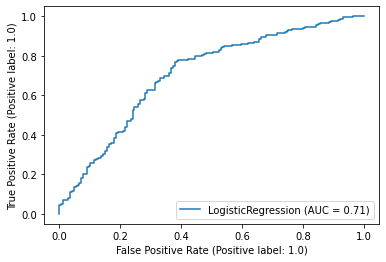

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr,x_test_,y_test_)
plt.show()       #under sampling is working well

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
svc = SVC()
svc.fit(x_train_u,y_train_u)
pred_svc = svc.predict(x_test_u)
cross_score = cross_val_score(svc,x_under,y_under,cv=5)
print(accuracy_score(y_test_u,pred_svc))
print(cross_score.mean())

0.7064702788006313
0.6565901482544236


In [ ]:
print(classification_report(pred_svc,y_test_u))

              precision    recall  f1-score   support

         0.0       0.68      0.71      0.70       902
         1.0       0.73      0.70      0.72       999

    accuracy                           0.71      1901
   macro avg       0.71      0.71      0.71      1901
weighted avg       0.71      0.71      0.71      1901



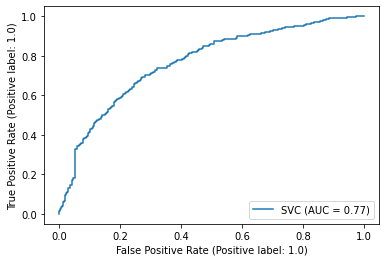

In [ ]:
plot_roc_curve(svc,x_test_u,y_test_u)
plt.show()

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train_u,y_train_u)
pred_dtc = dtc.predict(x_test_u)
cross_score = cross_val_score(dtc,x_under,y_under,cv=5)
print(accuracy_score(y_test_u,pred_dtc))
print(cross_score.mean())
print(classification_report(pred_dtc,y_test_u))

0.8984744871120462
0.5753658536585367
              precision    recall  f1-score   support

         0.0       0.80      0.99      0.89       759
         1.0       0.99      0.84      0.91      1142

    accuracy                           0.90      1901
   macro avg       0.90      0.91      0.90      1901
weighted avg       0.92      0.90      0.90      1901



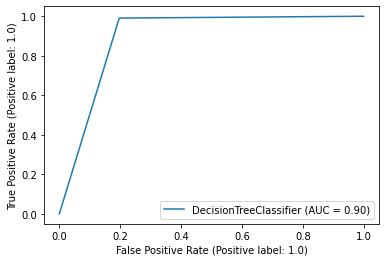

In [ ]:
plot_roc_curve(dtc,x_test_u,y_test_u)
plt.show()

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train_u,y_train_u)

pred_knn = knn.predict(x_test_u)
cross_score = cross_val_score(knn,x_under,y_under,cv=5)
print(accuracy_score(y_test_u,pred_knn))
print(cross_score.mean())
print(classification_report(pred_dtc,y_test_u))

0.7574960547080484
0.5899808703969391
              precision    recall  f1-score   support

         0.0       0.80      0.99      0.89       759
         1.0       0.99      0.84      0.91      1142

    accuracy                           0.90      1901
   macro avg       0.90      0.91      0.90      1901
weighted avg       0.92      0.90      0.90      1901



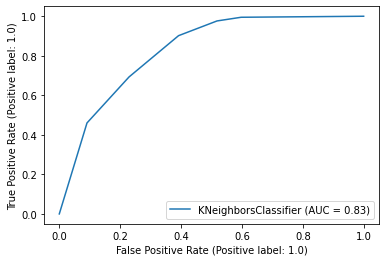

In [ ]:
plot_roc_curve(knn,x_test_u,y_test_u)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train_u,y_train_u)

p2 = rfc.predict(x_test_u)
print(accuracy_score(y_test_u,p2))
print(classification_report(y_test_u,p2))

0.9658074697527617
              precision    recall  f1-score   support

         0.0       0.99      0.94      0.96       934
         1.0       0.94      0.99      0.97       967

    accuracy                           0.97      1901
   macro avg       0.97      0.97      0.97      1901
weighted avg       0.97      0.97      0.97      1901



cross score 0.6164466762314682


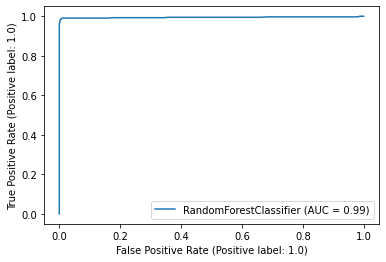

In [ ]:
cross_score = cross_val_score(rfc,x_under,y_under,cv=5)
print('cross score',cross_score.mean())

plot_roc_curve(rfc,x_test_u,y_test_u)
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(x_train_u,y_train_u)
p2 = ada.predict(x_test_u)
cross_score = cross_val_score(ada,x_under,y_under,cv=5)
print('accuracy score',accuracy_score(y_test_u,p2))
print('cross score',cross_score.mean())
print(classification_report(y_test_u,p2))

accuracy score 0.7148869016307207
cross score 0.6037350549976088
              precision    recall  f1-score   support

         0.0       0.72      0.69      0.70       934
         1.0       0.71      0.74      0.73       967

    accuracy                           0.71      1901
   macro avg       0.72      0.71      0.71      1901
weighted avg       0.72      0.71      0.71      1901



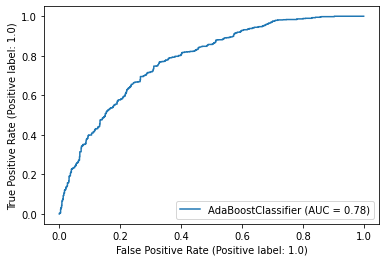

In [ ]:
plot_roc_curve(ada,x_test_u,y_test_u)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators':[100,300,500],
    'max_depth':[5,6,8],
    'min_samples_split':[50,100]
}
gb_ = RandomForestClassifier()

grid_obj_gb = GridSearchCV(gb_,parameters,cv=5)

grid_obj_gb.fit(x_train_u,y_train_u)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 6, 8], 'min_samples_split': [50, 100],
                         'n_estimators': [100, 300, 500]})

In [ ]:
print(grid_obj_gb.best_params_)
print(grid_obj_gb.best_score_)

{'max_depth': 8, 'min_samples_split': 50, 'n_estimators': 100}
0.7262044448028602


In [ ]:
gb_best =RandomForestClassifier(n_estimators=300,min_samples_split=50,max_depth=8)

gb_best.fit(x_train_u,y_train_u)

RandomForestClassifier(max_depth=8, min_samples_split=50, n_estimators=300)

In [ ]:
pred_gb_best = gb_best.predict(x_test_u)

accuracy_score(pred_gb_best,y_test_u)

print(classification_report(pred_gb_best,y_test_u))

              precision    recall  f1-score   support

         0.0       0.70      0.80      0.74       820
         1.0       0.83      0.74      0.78      1081

    accuracy                           0.76      1901
   macro avg       0.76      0.77      0.76      1901
weighted avg       0.77      0.76      0.76      1901



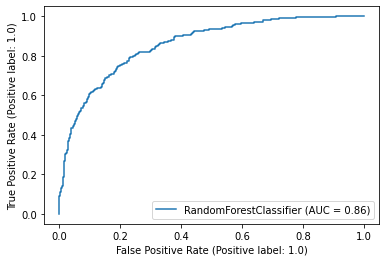

In [ ]:
plot_roc_curve(gb_best,x_test_u,y_test_u)
plt.show()